In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a transformation to preprocess the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

# Download and prepare the training and test datasets
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 26.4M/26.4M [00:01<00:00, 14.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 275kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.0MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [2]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
cnn_model = FashionMNISTModel()


In [3]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    cnn_model.train()  # Set the model to training mode
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()  # Reset gradients
        outputs = cnn_model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")


Epoch 1/5, Loss: 0.4414525706090653
Epoch 2/5, Loss: 0.2838255104575076
Epoch 3/5, Loss: 0.2370119079518547
Epoch 4/5, Loss: 0.20568341574768648
Epoch 5/5, Loss: 0.18060509462965957


In [4]:
torch.save(cnn_model.state_dict(), 'fashion_mnist_model1.pth')
print("Model weights saved as fashion_mnist_model1.pth")


Model weights saved as fashion_mnist_model1.pth


In [5]:
cnn_model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculations for evaluation
    for images, labels in test_loader:
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')


Accuracy of the model on the test set: 91.48%


In [6]:
from google.colab import files
files.download('fashion_mnist_model1.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import torch
import torch.nn as nn

# Define the same model architecture
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = FashionMNISTModel()
cnn_model.load_state_dict(torch.load('fashion_mnist_model1.pth'))
cnn_model.eval()  # Set to evaluation mode


<ipython-input-7-607d4173bdff>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load('fashion_mnist_model1.pth'))


FashionMNISTModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

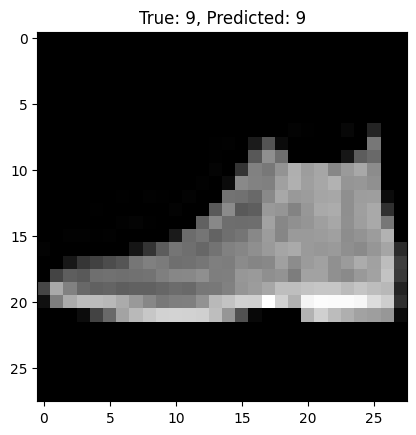

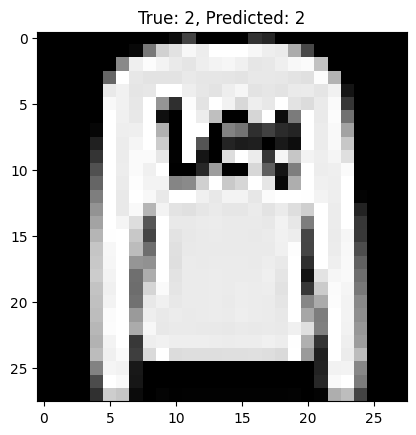

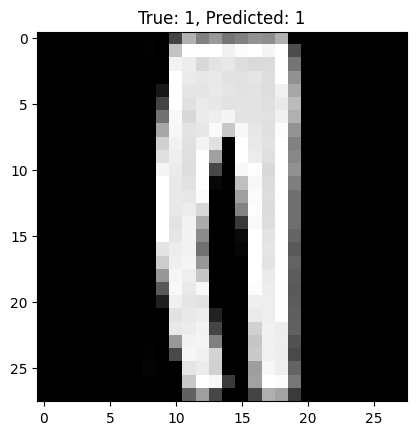

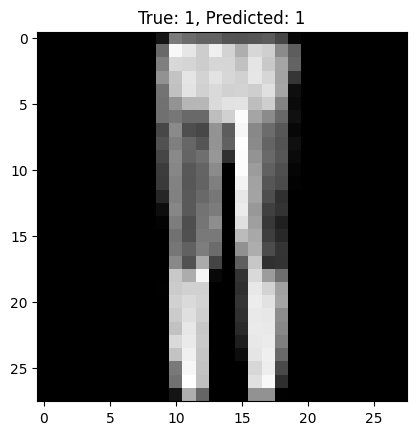

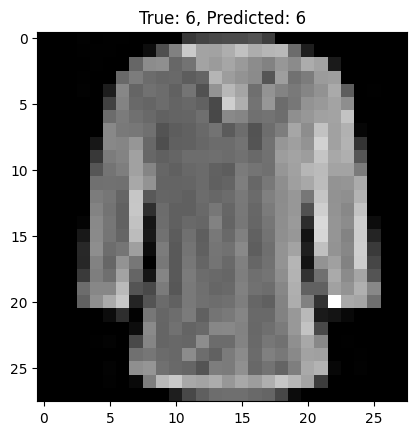

In [8]:
import matplotlib.pyplot as plt

cnn_model.eval()
with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
        outputs = cnn_model(images)
        _, predictions = torch.max(outputs, 1)
        for j in range(5):  # Show 5 predictions
            plt.imshow(images[j].squeeze(), cmap='gray')
            plt.title(f"True: {labels[j].item()}, Predicted: {predictions[j].item()}")
            plt.show()
        break


In [9]:
from sklearn.metrics import classification_report

y_true, y_pred = [], []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = cnn_model(images)
        _, predictions = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predictions.tolist())

print(classification_report(y_true, y_pred, target_names=test_data.classes))


              precision    recall  f1-score   support

 T-shirt/top       0.82      0.92      0.87      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.81      0.92      0.86      1000
       Dress       0.94      0.91      0.92      1000
        Coat       0.87      0.83      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.83      0.68      0.75      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

